<a href="https://colab.research.google.com/github/minakshimohanty/Diabetic-Retinopathy-Detection/blob/master/VGG_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [0]:
X_train = np.load('/content/drive/My Drive/Capstone 1/train_data_224.npy')
y_train = np.load('/content/drive/My Drive/Capstone 1/train_labels_224.npy')
X_test = np.load('/content/drive/My Drive/Capstone 1/test_data_224.npy')
y_test = np.load('/content/drive/My Drive/Capstone 1/test_labels_224.npy')

In [4]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Using TensorFlow backend.


In [0]:
IMG_HEIGHT = 224
IMG_WIDTH = 224

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.models import Model

model_vgg = VGG19(include_top=False, weights='imagenet', input_shape=(IMG_HEIGHT,IMG_WIDTH,3))
output = model_vgg.layers[-1].output
output = keras.layers.Flatten()(output)
model_vgg = Model(model_vgg.input, outputs=output)
for layer in model_vgg.layers:
    layer.trainable = False
model_vgg.summary() 

80142336/80134624 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

In [7]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers

model =  Sequential()
input_shape=(IMG_HEIGHT,IMG_WIDTH,3)
model.add(model_vgg)
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(5, activation='softmax')) 

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model (Model)                (None, 25088)             20024384  
_________________________________________________________________
dense (Dense)                (None, 512)               12845568  
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 2565      
Total params: 33,135,173
Trainable params: 13,110,789
Non-trainable params: 20,024,384
___________________________________

In [8]:
batch_size = 128
epochs = 30
num_classes = 5
X_train_norm = X_train/255
eyetest_train = model.fit(X_train_norm, y_train, batch_size = batch_size, epochs = epochs, validation_split=0.1) 

Epoch 1/30
19/19 [==============================] - 8s 397ms/step - loss: 1.1760 - accuracy: 0.5698 - val_loss: 1.2998 - val_accuracy: 0.5953
Epoch 2/30
19/19 [==============================] - 7s 353ms/step - loss: 0.9021 - accuracy: 0.6713 - val_loss: 0.7212 - val_accuracy: 0.6693
Epoch 3/30
19/19 [==============================] - 7s 355ms/step - loss: 0.8396 - accuracy: 0.6860 - val_loss: 0.8399 - val_accuracy: 0.6732
Epoch 4/30
19/19 [==============================] - 7s 355ms/step - loss: 0.8875 - accuracy: 0.6969 - val_loss: 1.2742 - val_accuracy: 0.5953
Epoch 5/30
19/19 [==============================] - 7s 354ms/step - loss: 0.7693 - accuracy: 0.7099 - val_loss: 0.7124 - val_accuracy: 0.7160
Epoch 6/30
19/19 [==============================] - 7s 355ms/step - loss: 0.7936 - accuracy: 0.7177 - val_loss: 0.6465 - val_accuracy: 0.7198
Epoch 7/30
19/19 [==============================] - 7s 355ms/step - loss: 0.8247 - accuracy: 0.7177 - val_loss: 0.6648 - val_accuracy: 0.7393
Epoch 

In [9]:
X_test_norm = X_test/255
eyetest_eval = model.evaluate(X_test_norm, y_test, verbose=0)
print('Test loss:', eyetest_eval[0])
print('Test accuracy:', eyetest_eval[1])

Test loss: 0.7236911058425903
Test accuracy: 0.7415832281112671


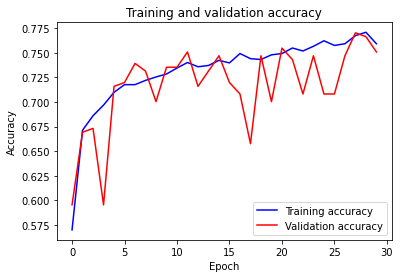

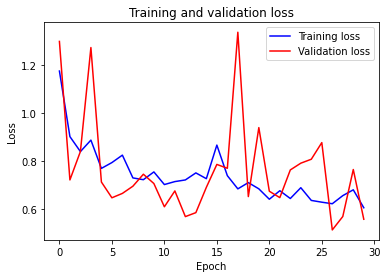

In [10]:
accuracy = eyetest_train.history['accuracy']
loss = eyetest_train.history['loss']
val_accuracy = eyetest_train.history['val_accuracy']
val_loss = eyetest_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [0]:
# predictions
y_pred = model.predict(X_test)

In [0]:
def decode(datum):
    return np.argmax(datum)
    

In [0]:
y_pred_decoded = []
for i in range(y_pred.shape[0]):
    y_pred_decoded.append(decode(y_pred[i]))

In [0]:
y_test_decoded = []
for i in range(y_test.shape[0]):
    y_test_decoded.append(decode(y_test[i]))

In [0]:
compare = np.column_stack((y_test_decoded, y_pred_decoded))

In [16]:
from sklearn.metrics import classification_report
#multilabel_confusion_matrix(y_test_decoded, y_pred_decoded)
target_names = ['No DR', 'Mild', 'Moderate', 'Severe', 'Proliferative DR']
print(classification_report(y_test_decoded, y_pred_decoded, target_names=target_names))

                  precision    recall  f1-score   support

           No DR       0.54      1.00      0.70       540
            Mild       0.00      0.00      0.00        98
        Moderate       0.56      0.19      0.28       302
          Severe       1.00      0.04      0.07        55
Proliferative DR       0.00      0.00      0.00       104

        accuracy                           0.55      1099
       macro avg       0.42      0.25      0.21      1099
    weighted avg       0.47      0.55      0.43      1099



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_decoded, y_pred_decoded, labels= [0,1,2,3,4]))

[[540   0   0   0   0]
 [ 89   0   9   0   0]
 [245   0  57   0   0]
 [ 37   0  16   2   0]
 [ 84   0  20   0   0]]
